In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [2]:
from malaya_speech.torch_model.vits.model_infer import SynthesizerTrn
from malaya_boilerplate.train.config import HParams
import json

/home/husein/.local/lib/python3.8/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.3.0 and strictly below 2.5.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.6.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(
/home/husein/.local/lib/python3.8/site-packages/tensorflow_addons/utils/resource_loader.py:72: UserWarning: You are currently using TensorFlow 2.6.0 and trying to load a custom op (custom_ops/seq2seq/_beam_search_ops.so).
TensorFlow Addons has compiled its custom ops again

In [3]:
# !pip3 install malaya-boilerplate==0.0.23rc0

In [4]:
config = '/home/husein/malay_vits/osman.json'

In [5]:
with open(config) as fopen:
    hps = HParams(**json.load(fopen))

In [6]:
from malaya_speech.utils.text import TTS_SYMBOLS
import torch

In [7]:
model = SynthesizerTrn(len(TTS_SYMBOLS),
                                   hps.data.filter_length // 2 + 1,
                                   hps.train.segment_size // hps.data.hop_length,
                                   **hps.model)

In [8]:
_ = model.eval()

In [9]:
!ls /home/husein/malay_vits/logs/osman/G_*.pth

/home/husein/malay_vits/logs/osman/G_0.pth
/home/husein/malay_vits/logs/osman/G_300000.pth
/home/husein/malay_vits/logs/osman/G_302500.pth
/home/husein/malay_vits/logs/osman/G_305000.pth
/home/husein/malay_vits/logs/osman/G_307500.pth
/home/husein/malay_vits/logs/osman/G_310000.pth
/home/husein/malay_vits/logs/osman/G_312500.pth
/home/husein/malay_vits/logs/osman/G_315000.pth
/home/husein/malay_vits/logs/osman/G_317500.pth
/home/husein/malay_vits/logs/osman/G_320000.pth
/home/husein/malay_vits/logs/osman/G_322500.pth
/home/husein/malay_vits/logs/osman/G_325000.pth
/home/husein/malay_vits/logs/osman/G_327500.pth
/home/husein/malay_vits/logs/osman/G_330000.pth
/home/husein/malay_vits/logs/osman/G_332500.pth
/home/husein/malay_vits/logs/osman/G_335000.pth
/home/husein/malay_vits/logs/osman/G_337500.pth
/home/husein/malay_vits/logs/osman/G_340000.pth
/home/husein/malay_vits/logs/osman/G_342500.pth
/home/husein/malay_vits/logs/osman/G_345000.pth
/home/husein/malay_vits/logs/osman/G_347500.p

In [10]:
pth = '/home/husein/malay_vits/logs/osman/G_425000.pth'

In [11]:
model.load_state_dict(torch.load(pth, map_location=torch.device('cpu'))['model'])

<All keys matched successfully>

In [12]:
from malaya_speech.torch_model.vits.commons import intersperse
import malaya_speech

In [13]:
normalizer = malaya_speech.utils.text.TextIDS(pad_to = None, is_lower = False)

In [34]:
text = 'Haqkiem adalah pelajar tahun akhir yang mengambil Ijazah Sarjana Muda Sains Komputer Kecerdasan Buatan utama dari Universiti Teknikal Malaysia Melaka (UTeM) yang kini berusaha untuk latihan industri di mana dia secara praktikal dapat menerapkan pengetahuannya dalam Perisikan Perisian dan Pengaturcaraan ke arah organisasi atau industri yang berkaitan.'

In [15]:
text = """
SHAH ALAM - Pertubuhan Kebajikan Anak Bersatu Selangor (PKABS) bersetuju pihak kerajaan mewujudkan Suruhanjaya Siasatan Diraja (RCI) untuk menyiasat isu kartel daging.
"""

In [38]:
t, ids = normalizer.normalize(text)
t

'Haqkiem adalah pelajar tahun akhir yang mengambil Ijazah Sarjana Muda Sains Komputer Kecerdasan Buatan utama dari Universiti Teknikal Malaysia Melaka , UTeM , yang kini berusaha untuk latihan industri di mana dia secara praktikal dapat menerapkan pengetahuannya dalam Perisikan Perisian dan Pengaturcaraan ke arah organisasi atau industri yang berkaitan .'

In [39]:
ids = intersperse(ids, 0)

In [40]:
ids = torch.LongTensor(ids)
ids_lengths = torch.LongTensor([ids.size(0)])
ids = ids.unsqueeze(0)

In [41]:
audio = model.infer(
    ids,
    ids_lengths,
    noise_scale=0.66666,
    noise_scale_w=0.66666,
    length_scale=1.0,
)

In [42]:
import matplotlib.pyplot as plt

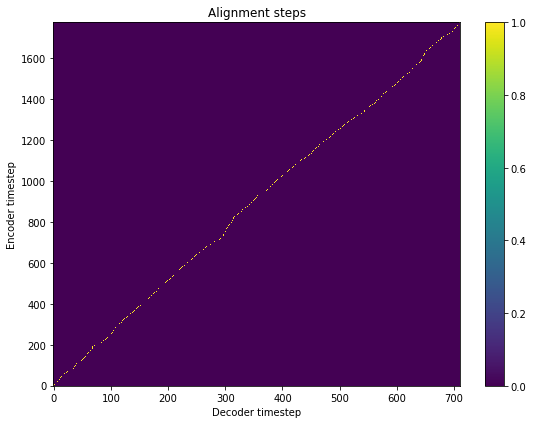

In [43]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.set_title('Alignment steps')
im = ax.imshow(
    audio[1][0,0].detach().numpy(),
    aspect='auto',
    origin='lower',
    interpolation='none')
fig.colorbar(im, ax=ax)
xlabel = 'Decoder timestep'
plt.xlabel(xlabel)
plt.ylabel('Encoder timestep')
plt.tight_layout()
plt.show()

In [44]:
audio[1][0,0].detach().numpy()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [45]:
y = audio[0][0,0].detach().numpy()

In [46]:
import IPython.display as ipd
ipd.Audio(y, rate = 22050)

In [49]:
torch.save(model.state_dict(), 'osman.pth')

In [48]:
!ls *.pth

haqkiem.pth


In [50]:
from malaya_boilerplate.huggingface import upload_dict

In [52]:
files_mapping = {'osman.pth': 'model.pth',
                config: 'config.json'}
upload_dict(model = 'VITS-osman', files_mapping = files_mapping, username = 'mesolitica')

/home/husein/.local/lib/python3.8/site-packages/huggingface_hub/hf_api.py:79: FutureWarning: `name` and `organization` input arguments are deprecated and will be removed in v0.7. Pass `repo_id` instead.
  warnings.warn(
409 Client Error: Conflict for url: https://huggingface.co/api/repos/create - You already created this model repo
